In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab/susi

/content/drive/MyDrive/Colab/susi


In [ ]:
#%run prepare_images_kind.py datasets/kind

Copied images from datasets/kind/maguro
Copied images from datasets/kind/ikura
Copied images from datasets/kind/sa-monn
Copied images from datasets/kind/ika
Copied images from datasets/kind/tamago
Copied images from datasets/kind/ebi
Copied images from datasets/kind/anago
Copied images from datasets/kind/hotate
Copied images from datasets/kind/buri
Copied images from datasets/kind/yaki_sa-monn
Copied images from datasets/kind/negitoro


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize
import glob
import cv2
import re

print(tf.__version__)

train_dir = 'target_datasets_kind/train'
val_dir = 'target_datasets_kind/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.7.0
class number=11
['anago', 'buri', 'ebi', 'hotate', 'ika', 'ikura', 'maguro', 'negitoro', 'sa-monn', 'tamago', 'yaki_sa-monn']


In [ ]:
'''
train_dir_2 = 'target_datasets_kind/train2'

if os.path.exists(train_dir_2):
    shutil.rmtree(train_dir_2)
shutil.copytree('target_datasets_kind/train', 'target_datasets_kind/train2')


'''
datagen = ImageDataGenerator(
        rotation_range=70,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=(0.1, 2.0),
        fill_mode='nearest')
'''
datagen = ImageDataGenerator(
        rotation_range=70,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=(0.8, 1.5),
        fill_mode='nearest')

          # 探す先のディレクトリ

### 探すファイルを指定する文字列
### os.path.join()は、カンマ(,)で区切られた文字列を'/'（または'\'）で結合し、パスを構成する。
### この例では 'data/*.txt' というパスがpatternに格納される。
### '*'はワイルドカード（任意の文字列）である。
### すなわち、これは「'data/'の中にある'.txt'で終わるファイルを全部探す」ことを意図している。
pattern0 = os.path.join(train_dir_2,'*')
pattern = os.path.join(pattern0,'*.jpg')


file_paths = glob.glob(pattern)     # patternにマッチする全てのファイルのパスをfile_pathsに格納する。

print(file_paths)

for file_path in file_paths:
  i = 0
  print(file_path)
  s=file_path
  s=re.sub('/[^/]*.jpg', '',s)
  s=s.replace('train2','train')
  print(s)


  img_array = cv2.imread(file_path,)  # 画像読み込み
  img_RGB = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_RGB.reshape((1,) + img_RGB.shape)  # 4次元データに変換（flow()に渡すため）

  for batch in datagen.flow(
    img_array, batch_size=1, shuffle=True,save_prefix='IMG',save_to_dir=s, save_format='jpg'):

      i += 1
      if i == 7:
          break  # 停止しないと無限ループ
  '''

['target_datasets_kind/train2/maguro/S__116277357.jpg', 'target_datasets_kind/train2/maguro/S__116277595.jpg', 'target_datasets_kind/train2/maguro/S__116277365.jpg', 'target_datasets_kind/train2/maguro/S__116277368.jpg', 'target_datasets_kind/train2/maguro/S__116277590.jpg', 'target_datasets_kind/train2/maguro/S__116277588.jpg', 'target_datasets_kind/train2/maguro/S__116277596.jpg', 'target_datasets_kind/train2/maguro/S__116277594.jpg', 'target_datasets_kind/train2/maguro/S__116277589.jpg', 'target_datasets_kind/train2/maguro/S__116277359.jpg', 'target_datasets_kind/train2/maguro/S__116277262.jpg', 'target_datasets_kind/train2/maguro/S__116277364.jpg', 'target_datasets_kind/train2/ikura/S__116277283.jpg', 'target_datasets_kind/train2/ikura/S__116277625.jpg', 'target_datasets_kind/train2/ikura/S__116277620.jpg', 'target_datasets_kind/train2/ikura/S__116277430.jpg', 'target_datasets_kind/train2/ikura/S__116277280.jpg', 'target_datasets_kind/train2/ikura/S__116277427.jpg', 'target_dataset

Found 1435 images belonging to 11 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 50 images belonging to 11 classes.
## Train Data Sample ##


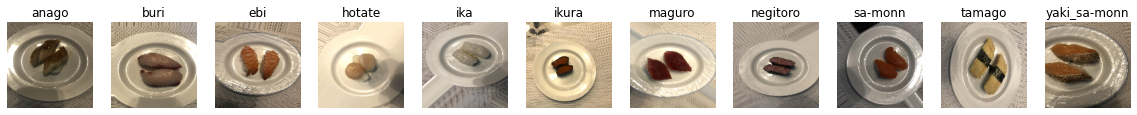

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                    

In [ ]:
# 学習率
LEARNING_RATE =0.0015
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 128

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180,width_shift_range=0.2,height_shift_range=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

print(type(train_data))


validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
#model.add(Conv2D(8, (3, 3)))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
#model.add(Dense(512))
#model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Prediction data
[[0.659 0.007 0.067 0.    0.    0.    0.003 0.    0.004 0.    0.259]
 [0.98  0.001 0.    0.    0.    0.    0.011 0.    0.    0.    0.008]
 [0.926 0.017 0.    0.    0.    0.001 0.056 0.    0.    0.    0.   ]
 [0.977 0.    0.    0.    0.    0.015 0.008 0.    0.    0.    0.   ]
 [0.986 0.    0.    0.    0.    0.    0.    0.    0.005 0.    0.009]
 [0.058 0.89  0.    0.003 0.    0.    0.001 0.019 0.    0.    0.029]
 [0.001 0.514 0.    0.016 0.    0.    0.    0.458 0.    0.    0.011]
 [0.023 0.001 0.    0.97  0.    0.    0.    0.003 0.    0.    0.003]
 [0.001 0.733 0.    0.244 0.001 0.    0.    0.    0.    0.    0.021]
 [0.    0.004 0.    0.996 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.978 0.    0.    0.    0.    0.    0.003 0.    0.019]
 [0.    0.    0.741 0.    0.    0.    0.    0.    0.257 0.    0.003]
 [0.    0.    0.733 0.    0.    0.    0.    0.    0.265 0.    0.001]
 [0.001 0.    0.893 0.    0.    0.    0.    0.    0.101 0.    0.005]
 [0.001 0.001 0.00

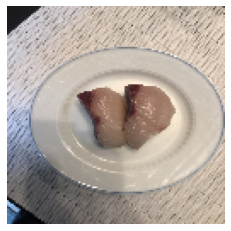

#8 Expected:buri -> Predicted:buri
File: buri/S__116277451.jpg
Each Prediction Value: [0.001 0.733 0.    0.244 0.001 0.    0.    0.    0.    0.    0.021]
* Correct *
#9 Expected:buri -> Predicted:hotate
File: buri/S__116277452.jpg
Each Prediction Value: [0.    0.004 0.    0.996 0.    0.    0.    0.    0.    0.    0.   ]
**** INCORRECT ****


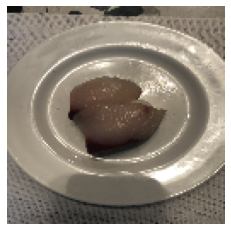

#10 Expected:ebi -> Predicted:ebi
File: ebi/S__116277647.jpg
Each Prediction Value: [0.    0.    0.978 0.    0.    0.    0.    0.    0.003 0.    0.019]
* Correct *
#11 Expected:ebi -> Predicted:ebi
File: ebi/S__116277649.jpg
Each Prediction Value: [0.    0.    0.741 0.    0.    0.    0.    0.    0.257 0.    0.003]
* Correct *
#12 Expected:ebi -> Predicted:ebi
File: ebi/S__116277650.jpg
Each Prediction Value: [0.    0.    0.733 0.    0.    0.    0.    0.    0.265 0.    0.001]
* Correct *
#13 Expected:ebi -> Predicted:ebi
File: ebi/S__116277656.jpg
Each Prediction Value: [0.001 0.    0.893 0.    0.    0.    0.    0.    0.101 0.    0.005]
* Correct *
#14 Expected:hotate -> Predicted:hotate
File: hotate/S__116277469.jpg
Each Prediction Value: [0.001 0.001 0.004 0.796 0.197 0.    0.    0.    0.    0.    0.001]
* Correct *
#15 Expected:hotate -> Predicted:hotate
File: hotate/S__116277471.jpg
Each Prediction Value: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#16 Expected:hotate -> Predicte

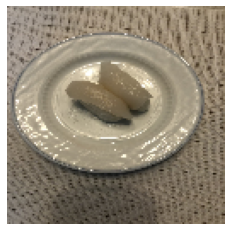

#22 Expected:ika -> Predicted:hotate
File: ika/S__116277564.jpg
Each Prediction Value: [0.    0.    0.    0.959 0.    0.    0.    0.    0.    0.    0.04 ]
**** INCORRECT ****


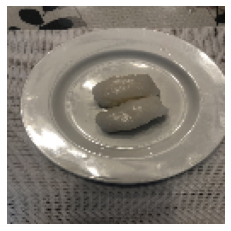

#23 Expected:ika -> Predicted:ika
File: ika/S__116277572.jpg
Each Prediction Value: [0.    0.    0.    0.253 0.736 0.    0.    0.    0.    0.    0.01 ]
* Correct *
#24 Expected:ikura -> Predicted:ikura
File: ikura/S__116277424.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#25 Expected:ikura -> Predicted:ikura
File: ikura/S__116277432.jpg
Each Prediction Value: [0.    0.    0.    0.    0.    0.998 0.002 0.    0.    0.    0.   ]
* Correct *
#26 Expected:ikura -> Predicted:ikura
File: ikura/S__116277619.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#27 Expected:ikura -> Predicted:ikura
File: ikura/S__116277624.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#28 Expected:maguro -> Predicted:maguro
File: maguro/S__116277264.jpg
Each Prediction Value: [0.001 0.    0.    0.    0.    0.    0.997 0.    0.002 0.    0.   ]
* Correct *
#29 Expected:maguro -> Predicted:maguro
File: maguro/S__116277358.jpg
Each Predict

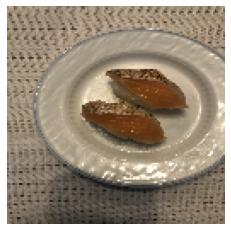

#46 Expected:yaki_sa-monn -> Predicted:yaki_sa-monn
File: yaki_sa-monn/S__116277396.jpg
Each Prediction Value: [0.007 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.993]
* Correct *
#47 Expected:yaki_sa-monn -> Predicted:yaki_sa-monn
File: yaki_sa-monn/S__116277552.jpg
Each Prediction Value: [0.041 0.004 0.281 0.001 0.    0.    0.    0.    0.005 0.    0.667]
* Correct *
#48 Expected:yaki_sa-monn -> Predicted:ebi
File: yaki_sa-monn/S__116277553.jpg
Each Prediction Value: [0.    0.    0.626 0.    0.    0.    0.    0.    0.    0.    0.373]
**** INCORRECT ****


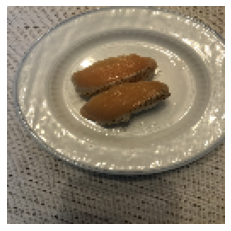

#49 Expected:yaki_sa-monn -> Predicted:ebi
File: yaki_sa-monn/S__116277563.jpg
Each Prediction Value: [0.001 0.    0.87  0.    0.    0.    0.    0.    0.005 0.    0.125]
**** INCORRECT ****


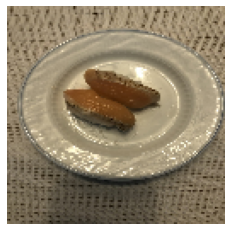

Loss


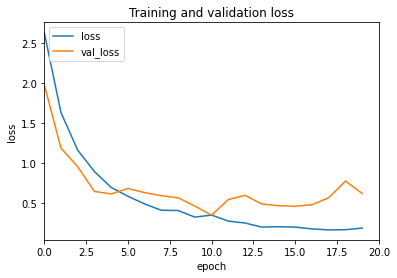

Accuracy


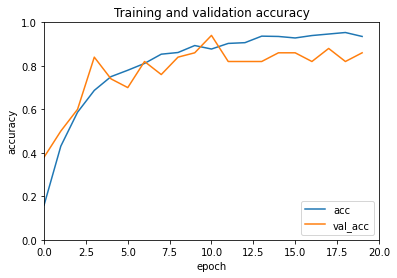

Confusion Matrix


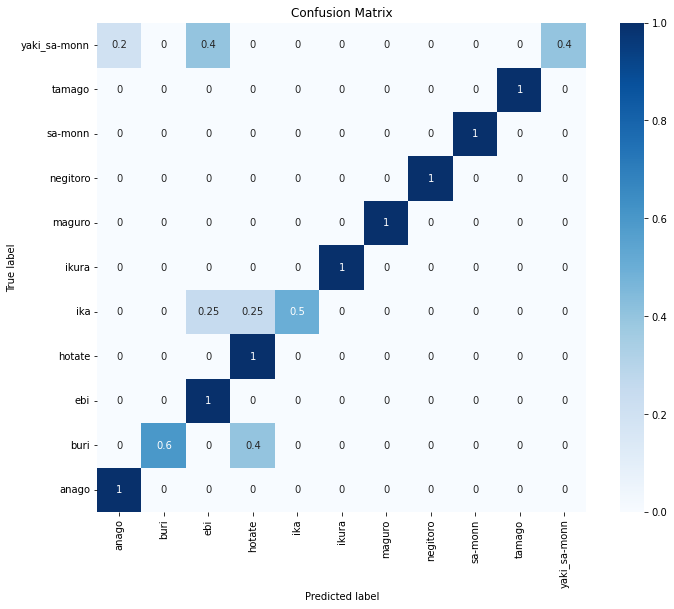

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)


# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d


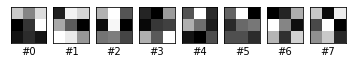

Visualize filter: conv2d_1


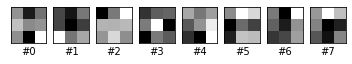

In [ ]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

In [ ]:
!cat incorrect.txt

target_datasets_kind/val/buri/S__116277328.jpg
target_datasets_kind/val/buri/S__116277452.jpg
target_datasets_kind/val/ika/S__116277413.jpg
target_datasets_kind/val/ika/S__116277564.jpg
target_datasets_kind/val/yaki_sa-monn/S__116277344.jpg
target_datasets_kind/val/yaki_sa-monn/S__116277553.jpg
target_datasets_kind/val/yaki_sa-monn/S__116277563.jpg


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                    

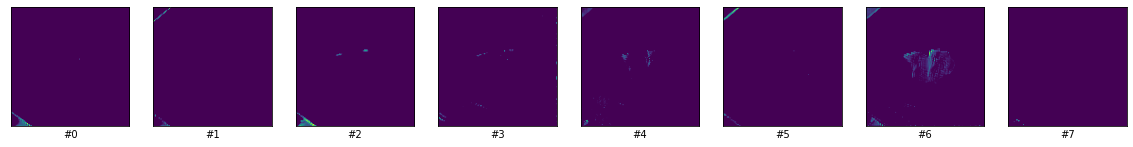

target_datasets_kind/val/buri/S__116277452.jpg


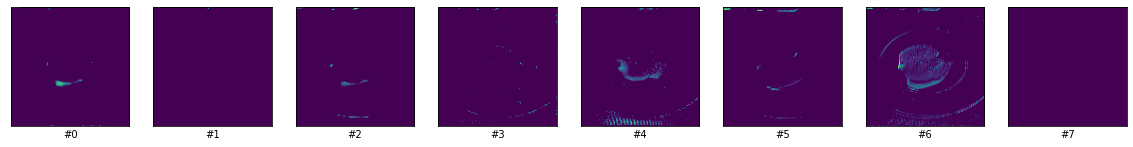

target_datasets_kind/val/ika/S__116277413.jpg


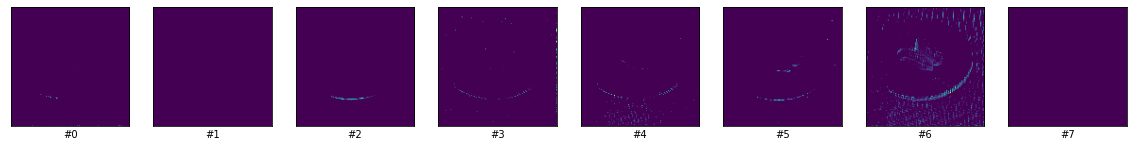

target_datasets_kind/val/ika/S__116277564.jpg


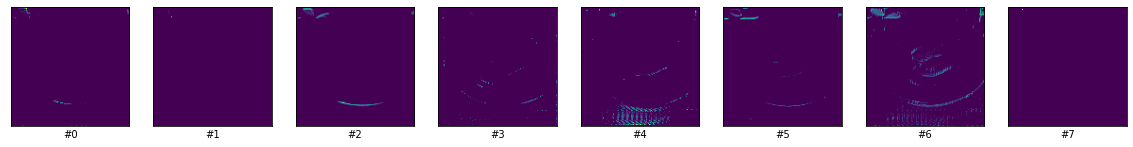

target_datasets_kind/val/yaki_sa-monn/S__116277344.jpg


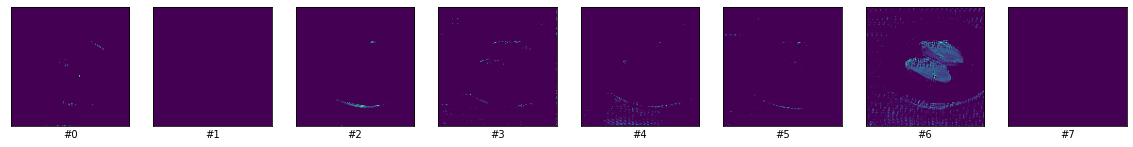

target_datasets_kind/val/yaki_sa-monn/S__116277553.jpg


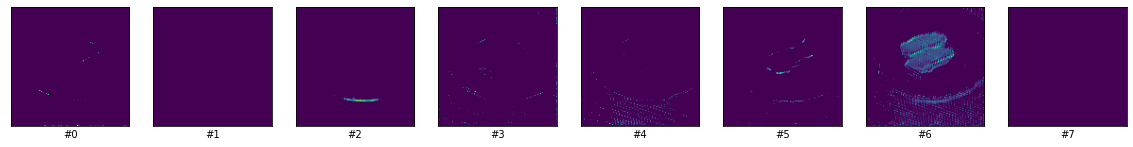

target_datasets_kind/val/yaki_sa-monn/S__116277563.jpg


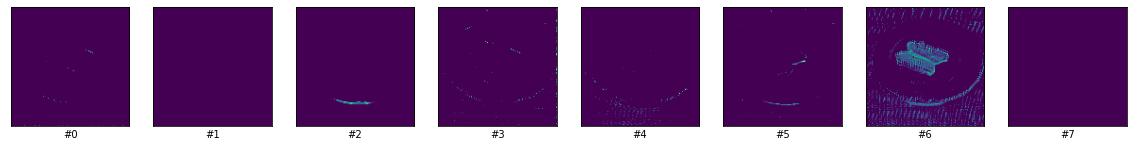

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)

In [ ]:
%ls

 correct.txt     prepare_images_collapse.py   susifolder_collapse/
 datasets/       prepare_images_kind.py       susifolder_kind/
 folder/         prepare_images.py            susi.ipynb
 incorrect.txt   __pycache__/                 target_datasets/
 main.ipynb      susi2.ipynb                  target_datasets_collapse/
 model/          susifolder2/                 target_datasets_kind/
 model_kind/    'susifolder2 - コピー'/       Trial.ipynb
 model.png       susifolder3/                 visualize.py


In [ ]:
save_model_path2 = os.path.join('model_kind', 'cp-1.ckpt')
model.save_weights(save_model_path2)

save_model_path_3 = os.path.join('model_kind', 'cp-2.ckpt')
model.save(save_model_path_3)

INFO:tensorflow:Assets written to: model_kind/cp-2.ckpt/assets
